In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
from run import *
plt.rcParams['figure.figsize'] = [20, 10]

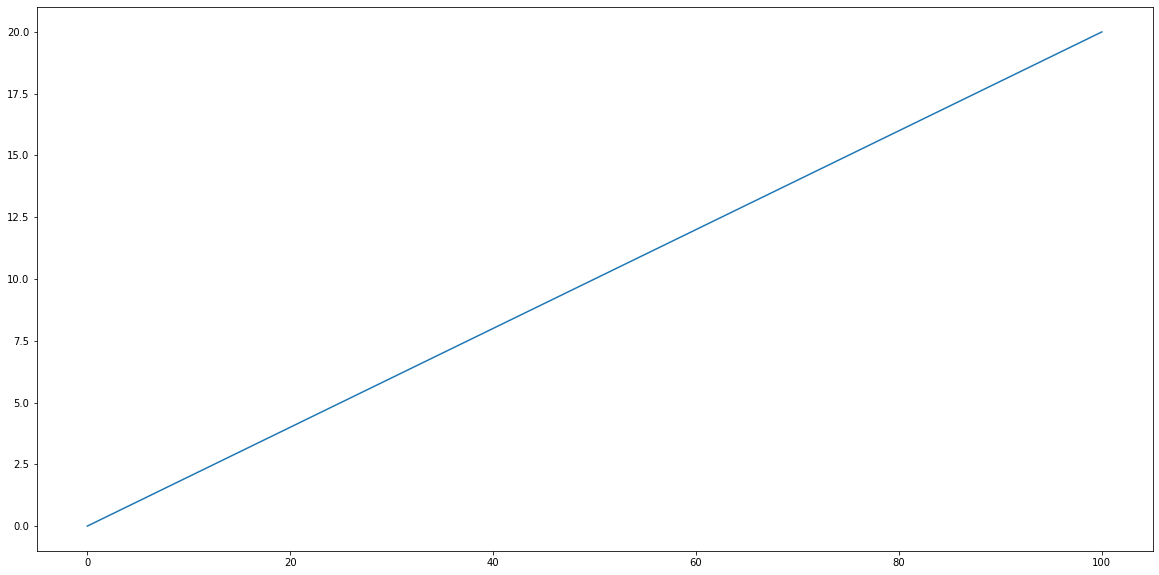

In [48]:
xs = np.linspace(0, 100, 20)
ys = list(map(lambda x: x/5, xs))
plt.plot(xs, ys);

# Hypothetical Plant with Basic Layouts

In [49]:
plant = Plant(heli_layout_file_name="../data/layouts/theater-layout.json")
print(plant)

Hypothetical Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 100.00]
		- [y_min, y_max] = [0.00, 20.00]
		- diameter = 101.98
		- max_ij = 101.98

	- receiver: 
		- _height = 50.00
		- _angle = 80.00
		- _size = 5.00

	- heliostats:
		- number of heliostats n = 20.00
		- heli_size = 3.00
		- heli_rays = 5.00
		- heli_layout = theater-layout 



In [50]:
plant.check_layout()

True

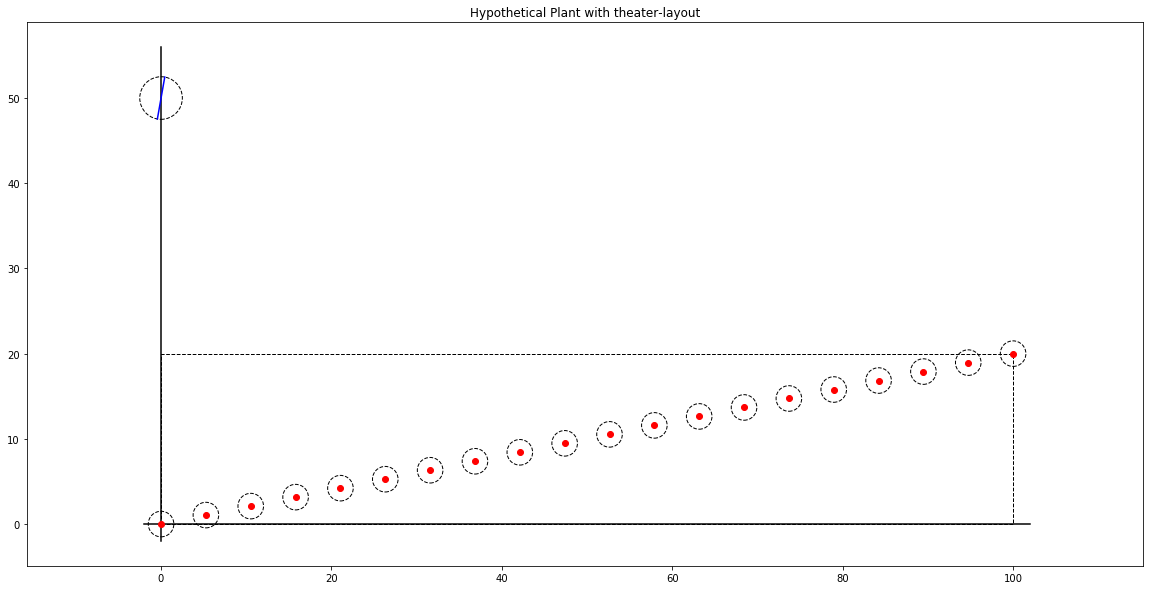

In [51]:
plant.draw()

Effects on heliostat 10: 

	* eta_aa = 0.987379
	* eta_cos = 0.773010
	* eta_sbm = 0.000000
	* received_rays / all_rays = 0 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [0 5 5] / 5



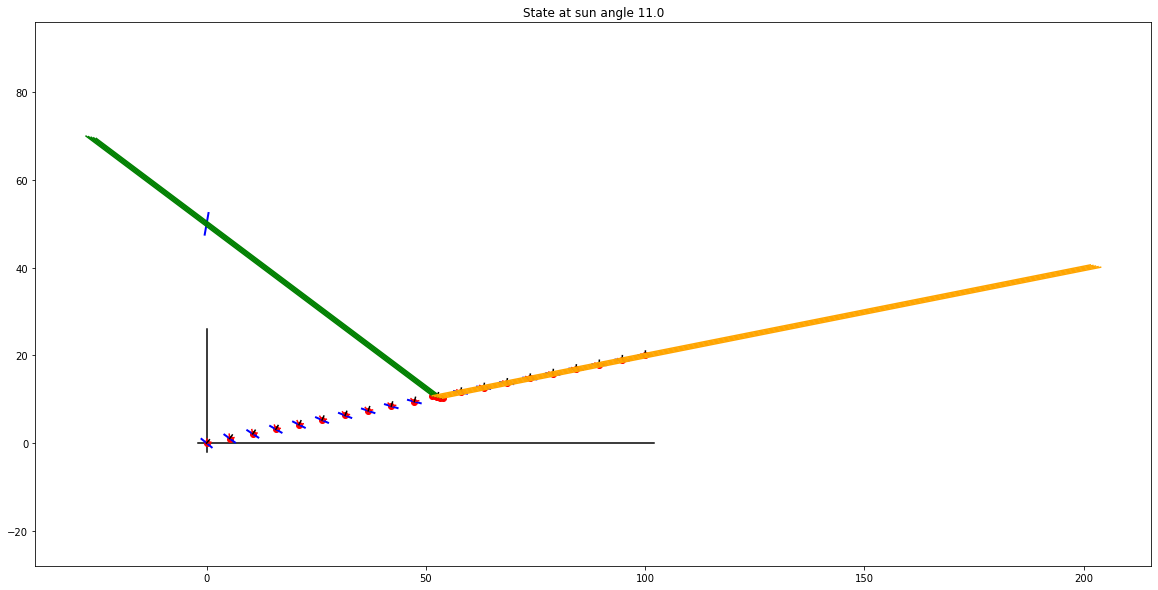

In [52]:
sun = Sun()
state = State(plant, sun_angle=sun.angles[1])
effects = state.get_effects(i=10, verbose=True)
state.draw(i=10)

In [53]:
energy, stats_df, powers = get_energy(plant, show_stats=True)

Hypothetical Plant with theater-layout

	- energy = 243.62269070867824893867

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9874, 0.8883, 0.8006

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.1318, 0.0059, 0.0741



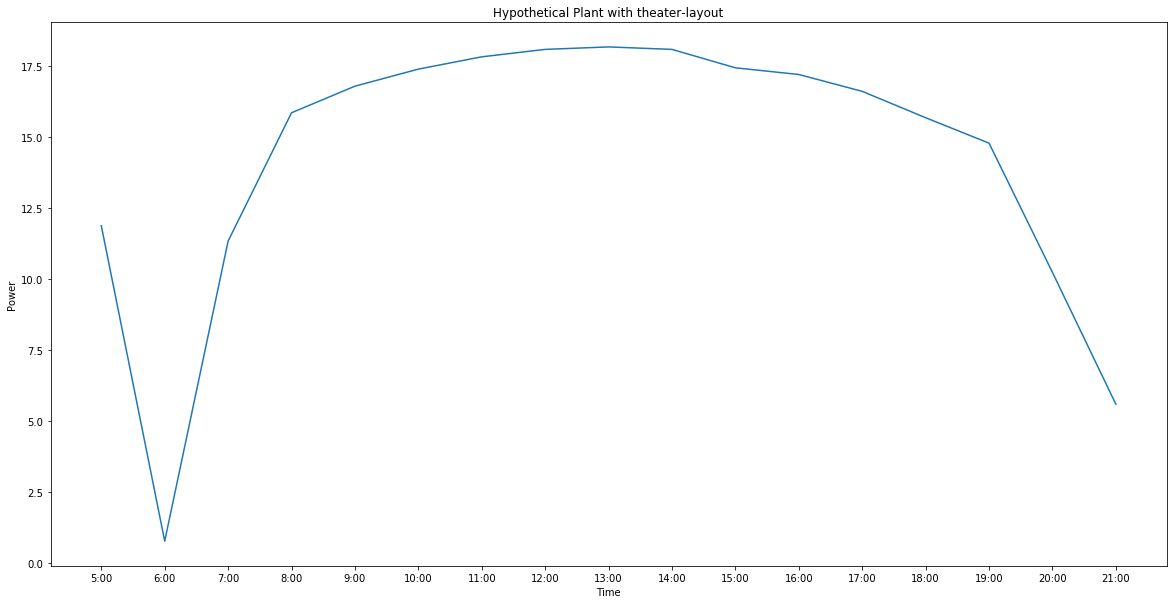

In [54]:
draw(plant, powers)

In [37]:
stats_df

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,6.981826,0.987379,0.707107,0.50,0.27,0.19,0.04
1,6:00,6.563989,0.987379,0.773010,0.43,0.29,0.25,0.06
2,7:00,6.896197,0.987379,0.831470,0.42,0.30,0.26,0.06
3,8:00,9.230382,0.987379,0.881921,0.53,0.20,0.27,0.06
4,9:00,10.399302,0.987379,0.923880,0.57,0.09,0.30,0.08
5,10:00,11.716302,0.987379,0.956940,0.62,0.02,0.30,0.08
6,11:00,11.427203,0.987379,0.980785,0.59,0.00,0.33,0.08
7,12:00,11.201922,0.987379,0.995185,0.57,0.00,0.35,0.08
8,13:00,11.256123,0.987379,1.000000,0.57,0.00,0.35,0.08
9,14:00,11.201922,0.987379,0.995185,0.57,0.00,0.35,0.08
